In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [3]:
path = "../dataset/"
filename = "data_3_final.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=';')

In [4]:
# Plotando 

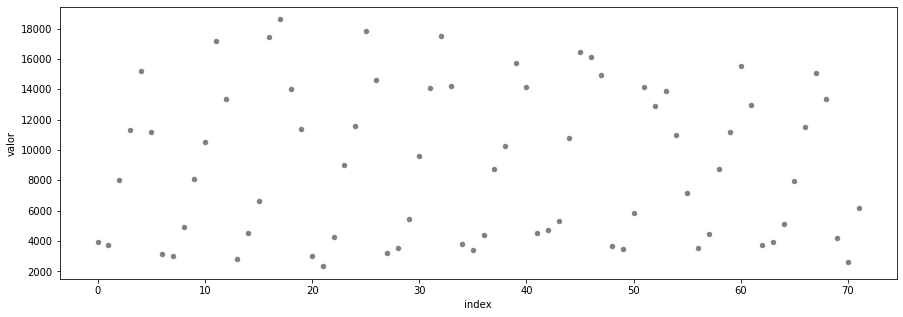

In [5]:
df.plot(kind='scatter', x='index', y='valor', color='gray')

In [6]:
df.tail(31)

,index,dia,mes,ano,valor
41,41,1,10,2018,4516.65
42,42,2,10,2018,4719.77
43,43,3,10,2018,5325.13
44,44,4,10,2018,10793.82
45,45,5,10,2018,16439.73
46,46,6,10,2018,16145.05
47,47,7,10,2018,14954.49
48,48,8,10,2018,3660.66
49,49,9,10,2018,3445.37
50,50,10,10,2018,5815.37


In [7]:
df_index = []
for i in range(41,72):
    df_index.append([i])

In [8]:
df_index

[[41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71]]

In [9]:
# Dropando dias do ultimo mes da df

In [10]:
proximas_faturas_dias = []
for i in range(41,72):
    valor = [df['valor'].values[i]]
    proximas_faturas_dias.append(valor)

df = df.drop(df.index[41:72])

target_df = proximas_faturas_dias

In [11]:
target_df

[[4516.65],
 [4719.77],
 [5325.13],
 [10793.82],
 [16439.73],
 [16145.05],
 [14954.49],
 [3660.66],
 [3445.37],
 [5815.37],
 [14164.03],
 [12916.15],
 [13871.97],
 [10994.9],
 [7181.68],
 [3534.76],
 [4463.52],
 [8746.33],
 [11200.49],
 [15562.98],
 [12947.56],
 [3710.66],
 [3932.56],
 [5117.4],
 [7973.97],
 [11496.88],
 [15060.21],
 [13367.74],
 [4178.29],
 [2623.59],
 [6190.43]]

In [12]:
# Test

In [13]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [14]:
X = pd.DataFrame(df['index'])
y = pd.DataFrame(df['valor'])

In [15]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [16]:
pred_df = (model.predict(df_index))

In [17]:
pred_df

array([[9916.69194747],
       [9885.98384937],
       [9850.95948093],
       [9811.61884215],
       [9767.96193302],
       [9719.98875355],
       [9667.69930373],
       [9611.09358358],
       [9550.17159308],
       [9484.93333223],
       [9415.37880104],
       [9341.50799951],
       [9263.32092764],
       [9180.81758542],
       [9093.99797286],
       [9002.86208996],
       [8907.40993671],
       [8807.64151312],
       [8703.55681918],
       [8595.15585491],
       [8482.43862028],
       [8365.40511532],
       [8244.05534001],
       [8118.38929436],
       [7988.40697836],
       [7854.10839203],
       [7715.49353534],
       [7572.56240832],
       [7425.31501095],
       [7273.75134324],
       [7117.87140518]])

In [18]:
y_test = pred_df
y_pred = target_df
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  4139.78032292246
MSE 20908444.88723924
RMSE 4572.575301429079


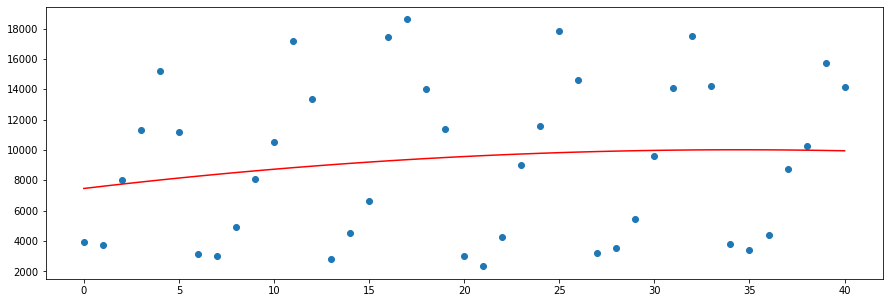

In [19]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [20]:
df.corr()

,index,dia,mes,ano,valor
index,1.000000,0.144819,0.767649,NaN,0.141153
dia,0.144819,1.000000,-0.522944,NaN,-0.119829
mes,0.767649,-0.522944,1.000000,NaN,0.199209
ano,NaN,NaN,NaN,NaN,NaN
valor,0.141153,-0.119829,0.199209,NaN,1.000000


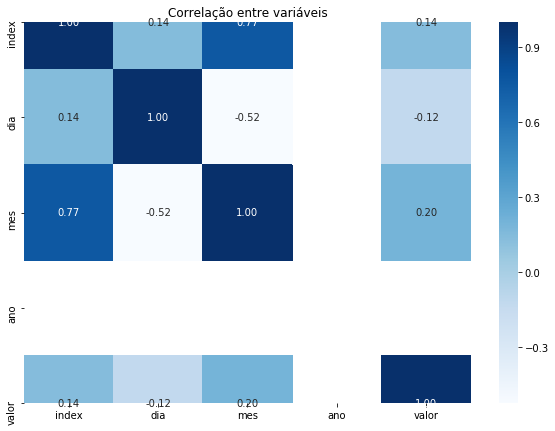

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()